In [1]:
import numpy as np
import pandas as pd
import ssl
import math
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().magic(u'matplotlib inline')
import heapq
import itertools
import random
from pprint import pprint
from sklearn.model_selection import train_test_split
import plotly.plotly as py
from scipy.linalg import svd

In [2]:
def data_preprocessing():
    
    
    df = pd.read_csv("intrusion_detection.csv")
    df["xAttack"] = df.apply(convert_string_to_float, axis=1)

    X = df.values[:, :-1] 
    y = df.values[:, -1]
    
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.3,random_state = 0) 

    X_train = feature_scaling(X_train)
    
#     train_data = X_train
#     train_data[:,-1] = y_train

#     validation_data = X_validation
#     validation_data[:,-1] = y_validation

#     validation_df = pd.DataFrame(validation_data)
    
    return X_train, X_validation, y_train, y_validation
    

In [3]:
def train_test_split_data(df, size):
    
    if isinstance(size, float):
        size = round(size * len(df))
    
    #getting indexes of dataset in a list
    indices = df.index.tolist()
    
    #randomly choosing "size" number of indices for validation set
    indices = random.sample(population=indices, k=size)

    #Creating validation set
    validation_df = df.loc[indices]
    
    #Creating trianing set
    train_df = df.drop(indices)
    
    return train_df, validation_df

In [4]:
def feature_scaling(train_data):
    
    no_of_columns = train_data.shape[1]
    
    global sd_mean_list
    
    sd_mean_list = []
    
    for index in range(no_of_columns):

        sd_val = np.std(train_data[:,index])
        mean_val = np.mean(train_data[:,index])
        train_data[:,index] = (train_data[:,index] - mean_val)/(sd_val)
        
        sd_mean_list.append([sd_val,mean_val])
        
    return train_data

In [5]:
def scale_test_data(X_test):
    
    global sd_mean_list
    
    for test_row in X_test:
        
        for index in range(len(test_row)):

            mean = sd_mean_list[index][1]
            sd = sd_mean_list[index][0]

            test_row[index] = (test_row[index] - mean)/sd

    return X_test
    

In [6]:
def convert_string_to_float(test_row):
    
    if test_row[-1] == "normal":
        return 0
    elif test_row[-1] == "dos":
        return  1
    elif test_row[-1] == "u2r":
        return  2
    elif test_row[-1] == "r2l":
        return  3
    elif test_row[-1] == "probe":
        return  4

In [7]:
def d22():
    X_train, X_validation, y_train, y_validation = data_preprocessing()

    # X_train = X_train - np.mean(X_train, axis=0)

    # covmat = np.dot(X_train.T,X_train)/(X_train.shape[0])

    # U, S, V = svd(covmat)

    # print(covmat.shape)
    # print(U.shape)
    # print(S.shape)
    # print(V.shape)

    # k = 15

    # Z = np.dot(X_train,U[:,0:k])

    # print(Z)

    # S_D = np.diag(S)

    # X_regenerate = np.dot(U[:,0:k],np.dot(S_D[0:k,:],V.T))

    # print(np.allclose(X_regenerate,covmat))

    # print(X_regenerate.shape)
    # print(X_regenerate[0])
    # print(covmat[0])

    # u, s, vh = np.linalg.svd(covmat, full_matrices=True)
    # print(u.shape, s.shape, vh.shape)

    # np.allclose(covmat, np.dot(u[:, :k] * s, vh))

    # smat = np.zeros((29, k), dtype=complex)
    # smat[:k, :k] = np.diag(s)
    # np.allclose(a, np.dot(u, np.dot(smat, vh)))
    from scipy.linalg import svd
    k = 27
    # u, s, vh = np.linalg.svd(X_train, full_matrices=False)
    print(X_train.T.shape)
    u, s, vh = svd(X_train.T, full_matrices=False)

    print(u.shape, s.shape, vh.shape)
    # print(X_train.shape)

    X_train = X_train.T

    Sigma = np.zeros((X_train.shape[0], X_train.shape[1]))
    Sigma[:X_train.shape[0], :X_train.shape[0]] = np.diag(s)

    Sigma = Sigma[:, :k]
    vh = vh[:k, :]
    # reconstruct
    B = u.dot(np.dot(Sigma,vh))
    print(B.shape)
    # transform
    print(u.shape, s.shape, vh.shape)
    T = np.dot(u,Sigma)
    # print(T)
    print(T.shape)
    T = np.dot(X_train,vh.T)
    print(T.shape)

    # print(np.allclose(X_train, np.matmul(u[:,0:k] * s[0:k], vh[0:k,:])))

    # print(np.allclose(X_train, np.matmul(u, s[..., None] * vh)))

    # k = 27

    # Z = np.dot(X_train,u[:,0:k])
    # X_regenerate = np.matmul(u[:,0:k] * s[0:k], vh[0:k,:])

    # print(Z[0])

    # print(X_train[0])
    # print(X_regenerate[0])
    # print((X_train - X_regenerate))
    # print(np.sum(X_train - X_regenerate))


In [8]:
def d():
    U, s, Vt = np.linalg.svd(M, full_matrices=False)
    V = Vt.T

    # PCs are already sorted by descending order 
    # of the singular values (i.e. by the
    # proportion of total variance they explain)

    # if we use all of the PCs we can reconstruct the noisy signal perfectly
    S = np.diag(s)
    Mhat = np.dot(U, np.dot(S, V.T))
#     print "Using all PCs, MSE = %.6G" %(np.mean((M - Mhat)**2))

#     # if we use only the first 20 PCs the reconstruction is less accurate
#     Mhat2 = np.dot(U[:, :20], np.dot(S[:20, :20], V[:,:20].T))
#     print "Using first 20 PCs, MSE = %.6G" %(np.mean((M - Mhat2)**2))

    fig, [ax1, ax2, ax3] = plt.subplots(1, 3)
    ax1.imshow(img)
    ax1.set_title('true image')
    ax2.imshow(noisy.mean(0))
    ax2.set_title('mean of noisy images')
    ax3.imshow((s[0]**(1./2) * V[:,0]).reshape(img.shape))
    ax3.set_title('first spatial PC')
    plt.show()

In [9]:
def dum2():
    from numpy import array
    from numpy import diag
    from numpy import zeros
    from scipy.linalg import svd
    # define a matrix
    A = array([
        [1,2,3,4,5,6,7,8,9,10],
        [11,12,13,14,15,16,17,18,19,20],
        [21,22,23,24,25,26,27,28,29,30]])
    print(A.shape)
    # Singular-value decomposition
    U, s, VT = svd(A)

    print(U.shape,s.shape,VT.shape)

    # create m x n Sigma matrix
    Sigma = zeros((A.shape[0], A.shape[1]))
    # populate Sigma with n x n diagonal matrix
    print(Sigma.shape)
    print(diag(s).shape)
    Sigma[:A.shape[0], :A.shape[0]] = diag(s)
    # select
    n_elements = 2
    Sigma = Sigma[:, :n_elements]
    VT = VT[:n_elements, :]
    # reconstruct
    B = U.dot(Sigma.dot(VT))
    print(B)
    # transform
    T = U.dot(Sigma)
    print(T)
    T = A.dot(VT.T)
    print(T)

Eigenvalues in descending order:
6.746801352285199
4.858376586397841
2.663128259708234
1.8830937147253963
1.4726026737586106
1.3295144786680015
1.1178166054530596
1.0680006762499121
1.0220487412307482
1.0023062482157692
0.9557215809334267
0.9150570255508345
0.7204221266551223
0.65726555688893
0.5000133713539052
0.44789811490813014
0.4070953169640057
0.3613348322914822
0.34116488552317364
0.2095461033424774
0.09735369784509215
0.06680112977275586
0.05217343049256102
0.04230979607991051
0.029656324577464612
0.016579714911114023
0.00979367064574685
0.004605234395764877
0.00151875017534643
[ 23.26483225  40.01785496  49.20105586  55.69448246  60.77242271
  65.3569554   69.21149542  72.89425637  76.41856237  79.87479082
  83.17038247  86.32575153  88.80996576  91.07639871  92.80058275
  94.34505901  95.74883597  96.99481815  98.17124879  98.89382156
  99.22952396  99.45987269  99.63978107  99.78567691  99.8879401
  99.94511153  99.97888281  99.99476293 100.        ]
[1, 2, 3, 4, 5, 6, 7, 8,

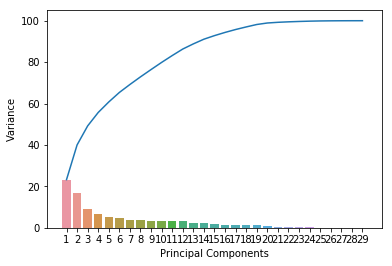

In [10]:
X_train, X_validation, y_train, y_validation = data_preprocessing()

mean_vec = np.mean(X_train, axis=0)
cov_mat = (X_train - mean_vec).T.dot((X_train - mean_vec)) / (X_train.shape[0])

# print(cov_mat)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

print(cum_var_exp)

x_data = [i+1 for i in range(29)]
print(x_data)
x_datax = [i for i in range(29)]
print(x_datax)

barplot = pd.DataFrame(
    {'Principal Components': x_data,
     'Variance': var_exp
    })
    
barplot = barplot.melt('Principal Components',value_name='Variance')
barplot_graph = sns.barplot(x="Principal Components", y="Variance", data=barplot)

lineplot = pd.DataFrame(
    {'Principal Components': x_datax,
     'Variance': cum_var_exp
    })
    
lineplot = lineplot.melt('Principal Components',value_name='Variance')
lineplot_graph = sns.lineplot(x="Principal Components", y="Variance", data=lineplot)


tl = []
for i in range(len(cum_var_exp)):
    if(cum_var_exp[i]<100):
        tl.append(eig_pairs[i][1].tolist())
    

matrix_w= np.matrix(tl)
print(np.dot(X_train,matrix_w.T))





# pca = PCA(28)
# # fit on data
# # X_test_std = StandardScaler().fit_transform(X_train)
# pca.fit(X_train)
# # access values and vectors
# #print(pca.components_)
# # print(sorted(pca.explained_variance_, reverse=True))
# # transform data
# B = pca.transform(X_train)

# tot = sum(pca.explained_variance_)
# var_exp = [(i / tot)*100 for i in sorted(pca.explained_variance_, reverse=True)]
# # print(var_exp)
# cum_var_exp = np.cumsum(var_exp)
# # print(cum_var_exp)
# print("sdgsdgsdgsdgsgsd")
# # print(B.shape)
# print(B)





In [19]:
def g():
    from numpy import array
    from sklearn.decomposition import PCA
    pca = PCA(14)
    # fit on data
    # X_test_std = StandardScaler().fit_transform(X_train)
    pca.fit(X_test_std)
    # access values and vectors
    #print(pca.components_)
    print(sorted(pca.explained_variance_, reverse=True))
    # transform data
    B = pca.transform(X_test_std)

    tot = sum(pca.explained_variance_)
    var_exp = [(i / tot)*100 for i in sorted(pca.explained_variance_, reverse=True)]
    # print(var_exp)
    cum_var_exp = nump.cumsum(var_exp)
    # print(cum_var_exp)

    print(B.shape)
    print(B)

In [14]:
def dum():

    X_train, X_validation, y_train, y_validation = data_preprocessing()

    U, s, Vh = np.linalg.svd(X_train, full_matrices=False)
    assert np.allclose(X_train, np.dot(U, np.dot(np.diag(s), Vh)))
    S = s
    s[21:] = 0
    new_a = np.dot(U, np.dot(np.diag(s), Vh))

    # print(X_train[0])
    # print(new_a[0])

    Sigma = zeros((X_train.shape[0], X_train.shape[1]))
    Sigma[:X_train.shape[1], :X_train.shape[1]] = diag(S)

    print(Vh.shape)

    Vh = Vh[:, :20]
    X_transformed = np.dot(X_train,Vh)
    print(X_transformed.shape)
    print(X_transformed[0])

    # X_transformed = np.dot(U,Sigma)













    from numpy import array
    from sklearn.decomposition import PCA
    pca = PCA(20)
    # fit on data
    # X_test_std = StandardScaler().fit_transform(X_train)
    pca.fit(X_train)
    # access values and vectors
    #print(pca.components_)
    # print(sorted(pca.explained_variance_, reverse=True))
    # transform data
    B = pca.transform(X_train)

    # tot = sum(pca.explained_variance_)
    # var_exp = [(i / tot)*100 for i in sorted(pca.explained_variance_, reverse=True)]
    # # print(var_exp)
    # cum_var_exp = np.cumsum(var_exp)
    # # print(cum_var_exp)

    print(B.shape)
    print(B[0])

In [30]:
A, X_validation, y_train, y_validation = data_preprocessing()
# A = A.T
U, s, VT = svd(A)
# create m x n Sigma matrix
Sigma = np.zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[1], :A.shape[1]] = np.diag(s)
# select
n_elements = 20
Sigma = Sigma[:, :n_elements]
VT = VT[:n_elements, :]
# reconstruct
B = np.dot(U,np.dot(Sigma,VT))
print(A[0])
print(B[0])
# transform
T = np.dot(U,Sigma)
print(T[0])
print(T.shape)
T = np.dot(A,VT.T)
print(T[0])
print(T.shape)

# A = A.T
from sklearn.decomposition import PCA
pca = PCA(20)
# fit on data
# X_test_std = StandardScaler().fit_transform(X_train)
pca.fit(A)
# access values and vectors
#print(pca.components_)
# print(sorted(pca.explained_variance_, reverse=True))
# transform data
B = pca.transform(A)
print(B.shape)
print(B[0])

[-0.11342238 -0.41786933 -0.05197784 -0.00165902 -0.08914433 -0.02542923
 -0.02265932 -0.02246624 -0.0226605  -0.04289901 -0.57769839  0.11071201
 -0.63488625 -0.62913584 -0.3740491  -0.37436668  0.76550954 -0.34690465
 -0.06426229  0.73697818  1.25229592  1.05942512 -0.43977497 -0.48094924
 -0.28927264 -0.63672005 -0.62347713 -0.38814025 -0.37471995]
[-1.14870711e-01 -4.19236226e-01 -5.08876664e-02 -4.22856248e-04
 -8.84859351e-02 -2.40800040e-02 -2.16345646e-02 -2.36503193e-02
 -2.28144724e-02 -4.23208049e-02 -5.79353521e-01  1.12609564e-01
 -6.34950206e-01 -6.30687354e-01 -3.80032989e-01 -3.71581943e-01
  7.67611546e-01 -3.43220436e-01 -6.20558418e-02  7.21909624e-01
  1.32464203e+00  9.71536828e-01 -4.49847792e-01 -4.69471029e-01
 -2.84650670e-01 -6.30334467e-01 -6.29455783e-01 -3.75180259e-01
 -3.83860348e-01]
[-1.90330308e+00 -8.83008275e-01  1.01770566e-01 -1.17502703e+00
  5.99327404e-01  3.16392949e-01  1.23790061e-01  1.14563527e-01
  2.97856004e-01 -3.06782989e-02 -1.4061287